## Accuracy Metrics for Time Series Forecasting

Forecasting plays a pivotal role in industry by providing critical insights and foresight. It enables efficient resource allocation, cost reduction, and demand planning. Industries rely on forecasts for optimizing inventory, enhancing supply chain efficiency, and making informed decisions in areas like finance, marketing, and risk management. Accurate forecasting empowers businesses to adapt to changing market dynamics, ensuring competitiveness and sustainability in today's dynamic business landscape. But How do you know if your forecasts are accurate for your business case?

### What is a Time Series?
A time series (or data series in general) is an ordered set 𝑇 = {𝑇1,𝑇2, . . . ,𝑇𝑚} of 𝑚 real-valued, potentially multidimensional data points where 𝑇𝑖 ∈ R 𝑛 .

It is a sequence of data points recorded or measured at successive points in time, typically at regular intervals. It is used to analyze and understand how a variable changes over time, making it valuable for forecasting and identifying trends, patterns, or anomalies in various fields like finance, economics, weather, and more. Time series data helps us make informed decisions by studying past behaviors to predict future outcomes.

### Time Series Analysis vs Forecasting
Time Series Analysis and Time Series Forecasting, while closely related, are distinct disciplines. They are frequently used interchangeably in various literature, but it's important to note that they exhibit notable differences, as outlined in the table below:

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a1.png" width="900"  alt="image">

Time series forecasting finds many applications in the industry, and one of its paramount roles is in supply chain management. In this domain, it plays a pivotal role in anticipating future demand patterns, aiding businesses in optimizing their inventory levels, reducing operational costs, and bolstering customer service. By ensuring products are available when needed and aligning resources with demand fluctuations, it empowers organizations to operate efficiently and maintain a competitive edge in the ever-evolving market landscape. Furthermore, its contributions extend to strategic long-term planning and sustainability efforts, making it an indispensable tool for modern supply chain operations.

### Challenges in Time Series Forecasting
Forecasting time series are much different from a normal regression analysis study. There are a number of factors which contribute to this fact. These include:

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a2.png" width="900"  alt="image">

### Importance of Accuracy Metrics in Time Series Forecasting
Considering the problems associated with the forecasting of Time Series, it is very important to have some accuracy metrics to judge your model.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a3.png" width="900"  alt="image">

- **Performance Assessment:** Accuracy metrics serve as yardsticks for evaluating the effectiveness of forecasting models. They allow us to gauge how well a model performs against historical data.

- **Model Optimization:** Armed with insights from accuracy metrics, iterative model optimization becomes possible. Businesses can refine forecasting models to enhance their performance and reliability over time.

- **Error Analysis:** Accuracy metrics help dissect the nature and magnitude of prediction errors. This understanding is invaluable for diagnosing where a model might be falling short and for making targeted improvements.

- **Informed Decision-Making:** Accurate forecasts are the foundation of informed decision-making. Businesses and organizations rely on these forecasts to make strategic choices, allocate resources efficiently, and respond to changing circumstances effectively.

- **Benchmarking:** Accuracy metrics enable the establishment of benchmarks and performance targets. This allows for a clear understanding of what constitutes a good forecast and aids in setting quality standards for models.

- **Continuous Improvement:** Accuracy metrics facilitate ongoing monitoring and evaluation. This ensures that forecast quality is maintained over time and can be adjusted in response to changing data patterns or business requirements.

### **The StatsForecast Library**
StatsForecast offers a collection of widely used univariate time series forecasting models, including automatic ARIMA, ETS, CES, and Theta modeling optimized for high performance using numba. It also includes a large battery of benchmarking models.

Features of NIXTLA StatsForecast Library include:

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a4.png" width="650"  alt="image">

### Forecasting Model Building

In [3]:
!pip install statsforecast -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Statsmodels will be used for time series decomposition and stationarity testing.
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# The statsforecast library will be used for time series forecasting.
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
url = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/Electric_Production.csv"

In [6]:
df = pd.read_csv(url,
                 parse_dates=['Date'],
                 index_col='Date',
                 )

df = df.resample("ME").max()
df

,Energy
Date,
1985-01-31,72.5052
1985-02-28,70.6720
1985-03-31,62.4502
1985-04-30,57.4714
1985-05-31,55.3151
...,...
2017-09-30,98.6154
2017-10-31,93.6137
2017-11-30,97.3359


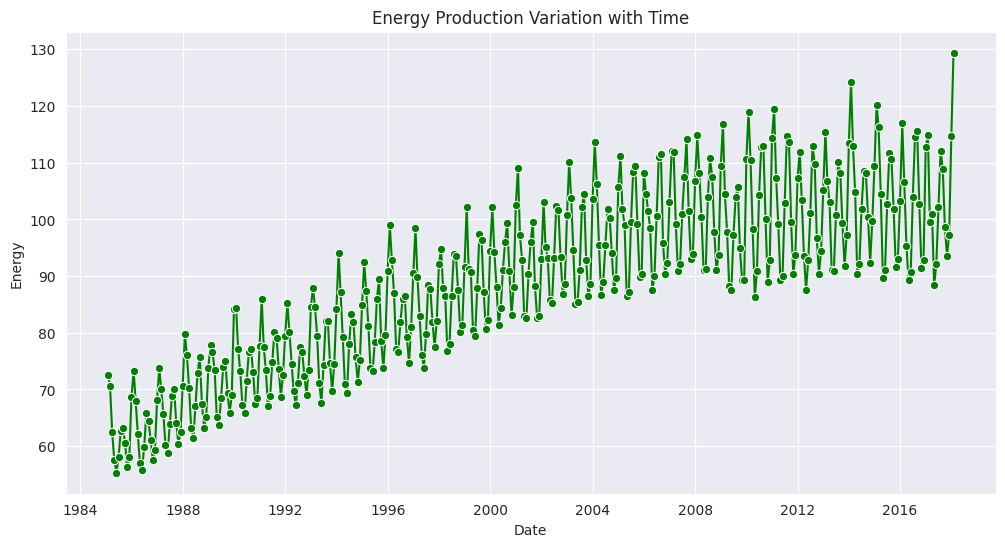

In [7]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x=df.index, y='Energy', marker='o', color='green')
plt.title('Energy Production Variation with Time')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.grid(True)

 Performing ETL Decomposition

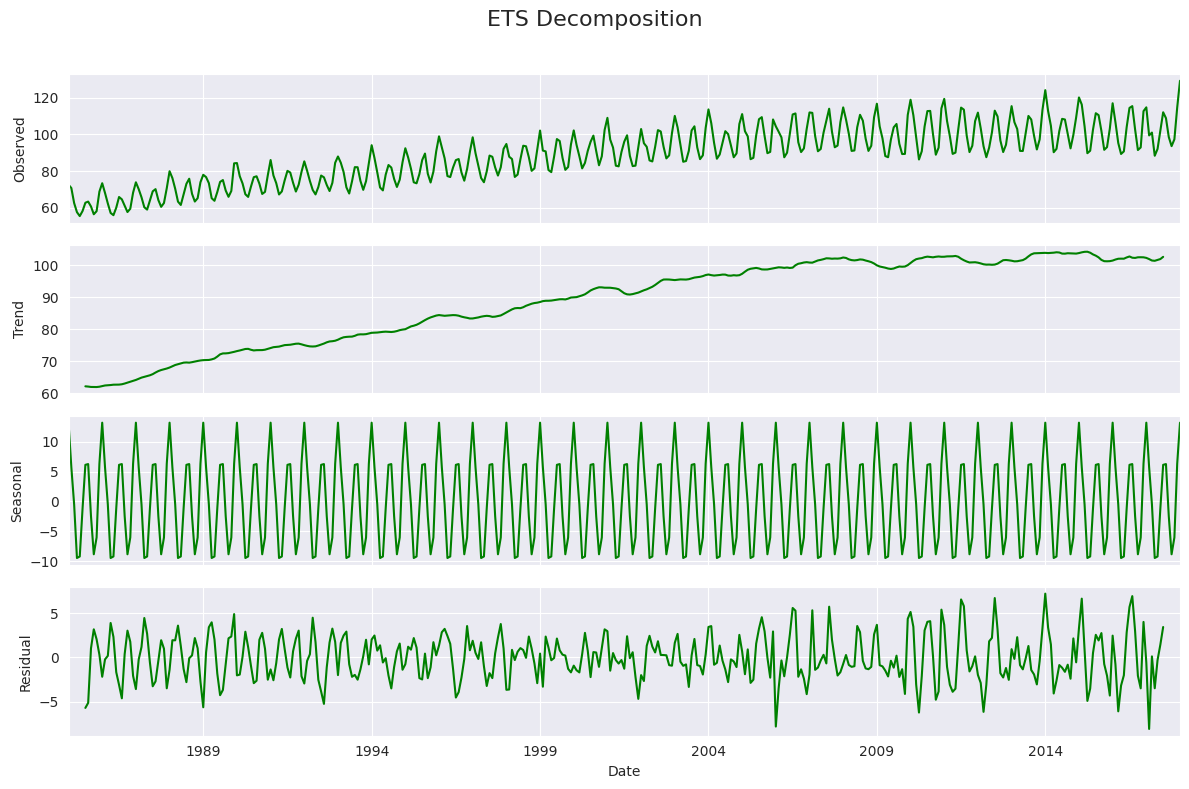

In [8]:
decomposition = seasonal_decompose(df['Energy'], model='additive', period=12)
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], color='green')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], color='green')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], color='green')
axes[3].set_ylabel('Residual')
plt.xlabel('Date')
plt.suptitle('ETS Decomposition', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

### ADF Test
Tests the null hypothesis that a time series has a unit root (is non-stationary)
Alternative hypothesis is that the series is stationary

Key Components:

Test Statistic: More negative values indicate stronger rejection of null hypothesis
p-value: If less than significance level (typically 0.05), we reject the null hypothesis
Critical Values: Different threshold values for different confidence levels


Interpretation:


- p-value < 0.05: Reject null hypothesis, series is stationary
- p-value > 0.05: Fail to reject null hypothesis, series is non-stationary

Common Results:

- Original price series are often non-stationary
- Returns and differenced series are typically stationary
- Economic indicators frequently require differencing to achieve stationarity

In [9]:
# Perform the Augmented Dickey-Fuller (ADF) test to assess stationarity
result = adfuller(df['Energy'])

# Print the ADF Statistic
print("ADF Statistic:", result[0])
print("p-value:", result[1])
# Print the Critical Values
print("Critical Values:", result[4])
# Check the p-value against the significance level (0.05) to make a stationarity inference
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data has no unit root, indicating seasonality.")
else:
    print("Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.")


ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}
Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.


## Model Building
Now let us build the model using StasForecast library. For this, the statsforecast library needs an “unique_id” row, a date row “ds” and the quantity row “y”.

So we will load our data into a new dataframe compatible with the library.

In [10]:
input_df = pd.DataFrame({'unique_id':[1.0]*len(df),
                         'ds':df.index,
                         'y':df["Energy"],
                         })
input_df

,unique_id,ds,y
Date,,,
1985-01-31,1.0,1985-01-31,72.5052
1985-02-28,1.0,1985-02-28,70.6720
1985-03-31,1.0,1985-03-31,62.4502
1985-04-30,1.0,1985-04-30,57.4714
1985-05-31,1.0,1985-05-31,55.3151
...,...,...,...
2017-09-30,1.0,2017-09-30,98.6154
2017-10-31,1.0,2017-10-31,93.6137
2017-11-30,1.0,2017-11-30,97.3359


In [11]:
# Split the data into training and testing sets (90% train, 10% test)
train_size = int(len(input_df) * 0.9)
train_data = input_df.iloc[:train_size]
test_data = input_df.iloc[train_size:]

# Define the season length as 12 months for monthly data
season_length = 12

# Define a list of models for forecasting
models = [AutoARIMA(season_length=season_length)] # ARIMA model with automatic order selection and seasonal component

# Instantiate the StatsForecast class with models, data frequency ('ME' for monthly),
forecast = StatsForecast(
                        models=models, # models for forecasting
                        freq='ME',  # frequency of the data
                        n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
                        )

# Fit the forecasting models to the training data
forecast.fit(train_data)

# Perform the forecast for the length of the test data
prediction = forecast.predict(h=len(test_data))

# Merge the test data with the forecasted values
final_test_data = pd.merge(test_data, prediction)
final_test_data.head()

,unique_id,ds,y,AutoARIMA
0,1.0,2014-10-31,92.3837,93.141749
1,1.0,2014-11-30,99.7033,97.549220
2,1.0,2014-12-31,109.3477,114.233989
3,1.0,2015-01-31,120.2696,122.308583
4,1.0,2015-02-28,116.3788,112.437502


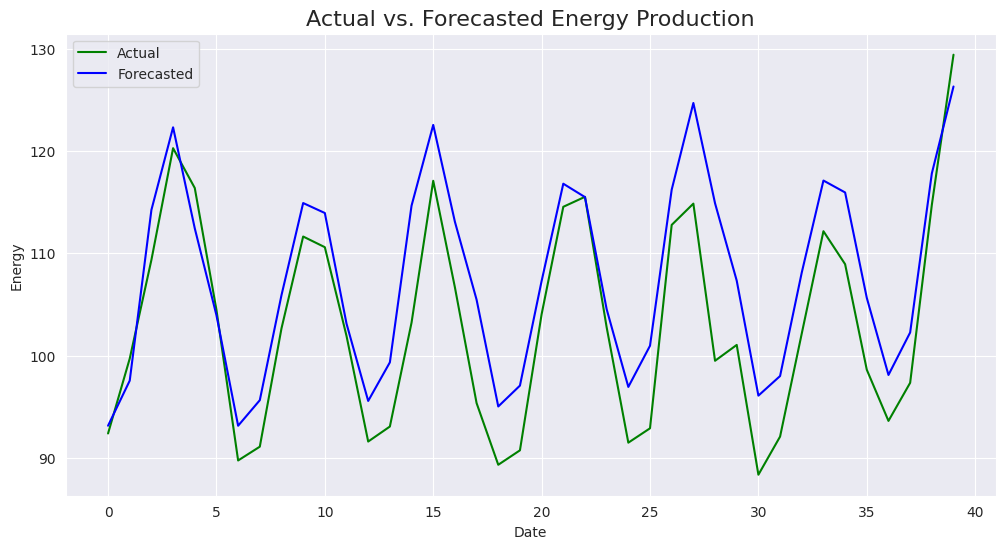

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_test_data, x=final_test_data.index, y='y', color='green', label='Actual')
sns.lineplot(data=final_test_data, x=final_test_data.index, y='AutoARIMA', color='blue', label='Forecasted')
plt.title('Actual vs. Forecasted Energy Production', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()

As observed in the graph above, we can assess the effectiveness of our model in predicting energy demand.

But how well is it performing?

If we were to create another model for the same dataset, would it outperform or underperform our current model?

To answer these questions, we need to rely on quantifiable measures known as Accuracy Metrics,

### Accuracy Metrics
The need to have accuracy metrices for time series forecasting has already been discussed. Now let’s check what are the accuracy metrices used in time series forecasting and how they are implemented.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a5.png" width="900"  alt="image">

### Mean Absolute Error (MAE)
The Mean Absolute Error (MAE) is a commonly used metric for measuring the accuracy of predictions or forecasts. It quantifies the average absolute difference between the predicted or forecasted values and the actual values. The formula for calculating MAE is as follows:

MAE = (1 / n) * Σ |actual — forecast|

Where:

MAE is the Mean Absolute Error.

n is the number of data points (samples).

Σ represents the sum over all data points.

|actual — forecast| is the absolute difference between the actual value and the forecasted value for each data point.

In [13]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(final_test_data['y'], final_test_data['AutoARIMA'])

# Print MAE
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 4.9737


MAE of 2.4685 indicates that, on average, our forecasts are off by about 2.4685 units from the actual values. A lower MAE suggests better accuracy, while a higher MAE indicates less accurate forecasts.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a6.png" width="900"  alt="image">

### Root Mean Squared Error (RMSE)
The Root Mean Squared Error (RMSE) is another widely used metric for measuring the accuracy of predictions or forecasts. RMSE quantifies the average magnitude of errors between the predicted or forecasted values and the actual values, giving more weight to larger errors. It’s an important metric, especially when larger errors are of greater concern. The mathematical expression for calculating RMSE is as follows:

RMSE = √((1 / n) * Σ(actual — forecast)²)

Where:

RMSE is the Root Mean Squared Error.

n is the number of data points (samples).

Σ represents the sum over all data points.

(actual — forecast)² is the squared difference between the actual value and the forecasted value for each data point.

In [14]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(final_test_data['y'], final_test_data['AutoARIMA'],)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 5.8348


RMSE quantifies the average magnitude of the errors. In this case, an RMSE of 3.8863 suggests that, on average, the forecasts are off by about 3.8863 units from the actual values.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a7.png" width="900"  alt="image">

### Mean Absolute Percentage Error (MAPE)
The Mean Absolute Percentage Error (MAPE) is a metric used to measure the accuracy of predictions or forecasts as a percentage of the actual values. It quantifies the average percentage difference between the predicted or forecasted values and the actual values. The mathematical expression for calculating MAPE is as follows:

MAPE = (1 / n) * Σ(|(actual — forecast) / actual|) * 100%

Where:

n is the number of data points (samples).

Σ represents the sum over all data points.

|(actual — forecast) / actual| is the absolute percentage difference between the actual value and the forecasted value for each data point.

The result is multiplied by 100% to express the error as a percentage.

In [15]:
mape = np.mean(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y'])) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

Mean Absolute Percentage Error (MAPE): 4.9396


A MAPE of 2.3075 suggests that, on average, your forecasts deviate by about 2.3075% from the actual values. A lower MAPE indicates better accuracy, while a higher MAPE suggests less accurate forecasts.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a8.png" width="900"  alt="image">

### Symmetric Mean Absolute Percentage Error (SMAPE)
The Symmetric Mean Absolute Percentage Error (SMAPE) is a metric used for measuring the accuracy of predictions or forecasts in time series analysis. It’s particularly useful when you want to assess forecast accuracy while considering both overestimation and underestimation errors. SMAPE calculates the percentage difference between predicted or forecasted values and actual values, but it symmetrically treats overestimation and underestimation errors. The mathematical expression for calculating SMAPE is as follows:

SMAPE = (1 / n) * Σ(2 * |actual — forecast| / (|actual| + |forecast|)) * 100%

Where:

SMAPE is the Symmetric Mean Absolute Percentage Error, expressed as a percentage.

n is the number of data points (samples).

Σ represents the sum over all data points.

|actual — forecast| is the absolute difference between the actual value and the forecasted value for each data point. |actual| and |forecast| are the absolute values of the actual and forecasted values, respectively.

The result is multiplied by 100% to express the error as a percentage.

In [16]:
smape = np.mean(np.abs(final_test_data['y'] - final_test_data['AutoARIMA']) /((np.abs(final_test_data['y'] +np.abs(final_test_data['AutoARIMA'])) / 2))) * 100

print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}")

Symmetric Mean Absolute Percentage Error (SMAPE): 4.7812


SMAPE of 2.3237 suggests that, on average, our forecasts deviate by about 2.3237% from the actual values in a symmetric manner. A lower SMAPE indicates better accuracy, while a higher SMAPE suggests less accurate forecasts.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a9.png" width="900"  alt="image">

###  Median Absolute Percentage Error (MDAPE)
MDAPE stands for Median Absolute Percentage Error. It is a performance metric used to evaluate the accuracy of forecasts in time series analysis. MDAPE is similar to the Mean Absolute Percentage Error (MAPE), but instead of taking the mean of the absolute percentage errors, it takes the median. This makes MDAPE less sensitive to outliers than MAPE.

The formula for calculating MDAPE is as follows:

MDAPE = Median(|(Actual — Forecast) / Actual|) * 100%

Where:

Actual represents the actual values or observations in the time series.

Forecast represents the corresponding forecasted values.

MDAPE is expressed as a percentage, and it measures the median percentage difference between the actual and forecasted values. It is particularly useful when dealing with time series data that may have extreme values or outliers because it focuses on the middle value of the distribution of percentage errors.

In [17]:
mdape = np.median(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']))*100

print(f"Median Absolute Percentage Error (MDAPE): {mdape:.4f}")

Median Absolute Percentage Error (MDAPE): 4.5658


An MDAPE of 1.4464 indicates that, on average, forecasting errors are relatively low, comprising approximately 1.4464% of actual values.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a10.png" width="900"  alt="image">

### Geometric Mean Relative Absolute Error (GMRAE)
The Geometric Mean Relative Absolute Error (GMRAE) is a metric used to assess the accuracy of predictions or forecasts in time series analysis. It takes the geometric mean of the relative absolute errors, providing a single aggregated measure of forecast accuracy. GMRAE is particularly useful when you want to consider both overestimation and underestimation errors. Here’s the mathematical formula for GMRAE:

GMRAE = (Π |(actual — forecast) / actual|)^(1/n) * 100%

Where:

GMRAE is the Geometric Mean Relative Absolute Error, expressed as a percentage.

Π represents the product over all data points.

|actual — forecast| is the absolute difference between the actual value and the forecasted value for each data point. |(actual — forecast) / actual| is the relative absolute error for each data point.

n is the number of data points (samples).

In words, GMRAE calculates the relative absolute error (the absolute difference divided by the actual value) for each data point, takes the product of these relative absolute errors, raises the result to the power of 1/n (where n is the number of data points), and then expresses the result as a percentage.

In [18]:
gmrae =np.prod(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']) ** (1/len(final_test_data["y"])))*100

print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae:.4f}")

Geometric Mean Relative Absolute Error (GMRAE): 3.6167


A GMRAE value of 1.4252 indicates that, on average, the forecasted values have an error of approximately 1.4252% relative to the actual values.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/TS/a11.png" width="900"  alt="image">

### Concluding Remarks
In this article, you have been introduced to the utilization of the Stasforecast library by Nixtla and have gained an understanding of the different accuracy metrics employed in time series forecasting, along with their respective advantages and disadvantages.

Key Takeaways:

- Use MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) when you want to measure the magnitude of errors and need a metric that is easy to interpret. RMSE is preferred when larger errors should be penalized more heavily.
- Use MAPE (Mean Absolute Percentage Error) and SMAPE (Symmetric Mean Absolute Percentage Error) when you want to express errors as percentages of actual values and need a metric that is suitable for comparing forecast performance across different datasets.
- Use MDAPE (Median Absolute Percentage Error) when dealing with time series data that may have outliers or extreme values. MDAPE is robust to outliers because it calculates the median of the absolute percentage errors.
- Use GMRAE (Geometric Mean Relative Absolute Error) when you want to compare forecast performance across different time series with varying scales. GMRAE provides a balanced measure of forecast accuracy across multiple forecasts.

Each of these metrics has its own strengths and weaknesses, and the choice should depend on your specific forecasting task, data characteristics, and the importance of different aspects of forecast accuracy. It’s often a good practice to consider multiple metrics to gain a comprehensive understanding of your forecasting model’s performance.